# Разделяющая поверхность

Рассмотрим нейрон с пороговой функией активации:

$$y = f(W*X + b)$$
$$f(x) = \begin{cases} 1, & \mbox{if } x > 0 \\ 0, & \mbox{if } x \leq 0 \end{cases}$$

Значение $y$ меняется, когда меняется знак $W*X + b$. Тогда область, в которой это происходит, задается выражением $W*X + b = 0$. В общем случае такая область называется *разделяющей поверхностью*. Т.е. $W*X + b$ - линейная операция, то и $W*X + b = 0$ будет задавать линейный объект (прямую, плоскость и т.п.).

### Пример 1

Попробуем посмотреть, как один нейрон разделяет область данных

Импортируем необходимые библиотеки

In [3]:
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(keras.__version__)

2.4.0


Объявим функцию, вход которой: пара (x, y), а выход {1, если x >= y, иначе 0}

In [2]:
def fun(xy):
    return xy[0] >= xy[1]

In [3]:
x = np.linspace(0, 10, num=50)
y = np.linspace(0, 10, num=50)

data = np.zeros((50, 50, 2))
for i in range(50):
    for j in range(50):
        data[i][j][0] = x[i]
        data[i][j][1] = y[j]

In [4]:
N_train = 500

tdata = data.copy()
tdata.resize(50*50, 2)
np.random.shuffle(tdata)
tdata = tdata[:N_train]

In [5]:
labels = np.array([int(fun(tdata[i])) for i in range(N_train)])

In [6]:
labels.shape

(500,)

Создадим и обучим нейронную сеть, состоящую всего из одного нейрона с сигмоидой в качестве функции активации.

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(tdata, labels, epochs=500, verbose=0) # Укажем verbose=0, чтобы скрыть 500 строк печати 

Посмотрим, что выдает нейронная сеть на всей сетке

In [43]:
data.resize(50*50, 2)
xx, yy = np.array(np.meshgrid(x, y))
z = model.predict(data)
# z = z > 0.5
z.resize(50, 50)

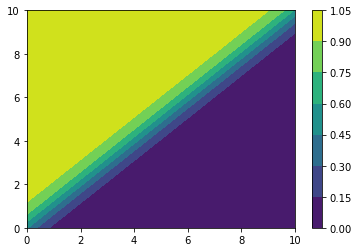

In [44]:
plt.contourf(xx,yy,z)
plt.colorbar()

А также найдем истинные значения на каждом участке сетки

In [45]:
xx, yy = np.array(np.meshgrid(x, y))
z = (yy >= xx)

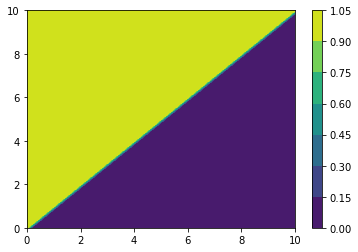

In [46]:
plt.contourf(xx,yy,z)
plt.colorbar()

### Пример 2

Зададим функцию "или".

In [47]:
x = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])

In [48]:
x.shape

(4, 2)

In [49]:
y = np.array([0, 1, 1, 1])

Обучим модель

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10000, verbose=0) # Укажем verbose=0, чтобы скрыть 500 строк печати 

In [51]:
test_loss, test_acc = model.evaluate(x,  y, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

1/1 - 0s - loss: 0.0041 - accuracy: 1.0000

Точность на проверочных данных: 1.0


Построим графики

In [52]:
x1 = np.linspace(0-0.1, 1+0.1, num=50)
x2 = np.linspace(0-0.1, 1+0.1, num=50)

x_plot = np.zeros((50, 50, 2))
for i in range(50):
    for j in range(50):
        x_plot[i][j][0] = x1[i]
        x_plot[i][j][1] = x2[j]

In [53]:
x_plot.resize(50*50, 2)
y_plot = model.predict(x_plot)
y_plot.resize(50, 50)

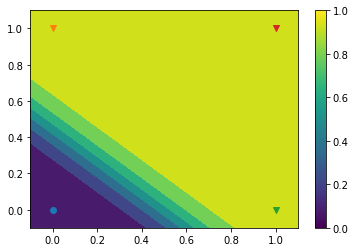

In [54]:
plt.figure()
plt.contourf(x1, x2, y_plot)
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1])
    else:
        plt.scatter(x[i][0], x[i][1], marker='v')
plt.colorbar()
plt.show()

Как было сказано ранее, разделяющей поверхностью для одного нейрона является прямая. Т.к. сигмоида всё же приближает пороговую функцию, то на практике видно не совсем прямую, а область плавного перехода одного в другое. Тем не менее, эта область так же имеет форму прямой.

В связи с этим ограничением существует известная проблема ограниченности одного нейрона, называемая XOR-проблем. Вкратце, один нейрон с пороговой функцией активации не способен решить задачу классификации, если данные линейно неразделимы, т.е. между ними нельзя провести прямую, плоскость и т.п.

Примером таких данных является функция XOR.

### Пример 3

In [96]:
x = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])

In [97]:
y = np.array([0, 1, 1, 0])

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10000, verbose=0) # Укажем verbose=0, чтобы скрыть 500 строк печати 

In [99]:
test_loss, test_acc = model.evaluate(x,  y, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

1/1 - 0s - loss: 0.6931 - accuracy: 0.5000

Точность на проверочных данных: 0.5


In [100]:
x1 = np.linspace(0-0.1, 1+0.1, num=50)
x2 = np.linspace(0-0.1, 1+0.1, num=50)

x_plot = np.zeros((50, 50, 2))
for i in range(50):
    for j in range(50):
        x_plot[i][j][0] = x1[i]
        x_plot[i][j][1] = x2[j]

In [101]:
x_plot.resize(50*50, 2)
y_plot = model.predict(x_plot)
y_plot = y_plot > 0.5
y_plot.resize(50, 50)

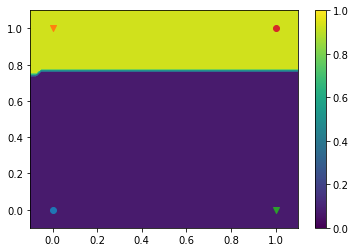

In [102]:
plt.figure()
plt.contourf(x1, x2, y_plot)
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1])
    else:
        plt.scatter(x[i][0], x[i][1], marker='v')
plt.colorbar()
plt.show()

Как видно из графика, невозможно провести прямую так, чтобы отделить данные друг от друга. Поэтому один нейрон не способен справиться с данной задачей. К счастью, эта проблема решаема, и чуть ниже мы посмотрим, как, но перед этим давайте разберём ещё одну идею.

### Пример 4

В примерах выше мы разбирали случаи, когда у нас всего 2 класса. А что, если их будет больше? Давайте добавим точек и увеличим количество классов до 5.

In [24]:
x = np.zeros((36, 2))
i = 0
for x1 in [0, 0.2, 0.4, 0.6, 0.8, 1]:
    for x2 in [0, 0.2, 0.4, 0.6, 0.8, 1]:
        x[i][0], x[i][1] = x1, x2
        i += 1
y = np.array([0]*6 + [1]*6 + [2]*6 + [3]*6 + [4]*6 + [5]*6)
print(y)
print(y.shape)

[0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5]
(36,)


Для работы нашего классификатора нам необходимо определенным образом закодировать каждый класс. А именно, теперь y будет содержать не числа-метки, а векторы. Данные веткторы будут содержать 1 на одном из индексов, соответствующем метке, и 0 на всех остальных. В нашем примере мы хотели бы получить что-то такое:

- 0 -> 1 0 0 0 0 0
- 1 -> 0 1 0 0 0 0
- 2 -> 0 0 1 0 0 0
- 3 -> 0 0 0 1 0 0
- 4 -> 0 0 0 0 1 0
- 5 -> 0 0 0 0 0 1

Воспользуемся встроенной в tensorflow утилитой.

In [25]:
from tensorflow.keras.utils import to_categorical

y_onehot = to_categorical(y)

In [28]:
print(y_onehot.shape)
print(y[0], y_onehot[0])
print(y[20], y_onehot[20])

(36, 6)
0 [1. 0. 0. 0. 0. 0.]
3 [0. 0. 0. 1. 0. 0.]


In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y_onehot, epochs=30000, verbose=0) # Укажем verbose=0, чтобы скрыть 500 строк печати 

In [8]:
x1 = np.linspace(0-0.1, 1+0.1, num=50)
x2 = np.linspace(0-0.1, 1+0.1, num=50)

x_plot = np.zeros((50, 50, 2))
for i in range(50):
    for j in range(50):
        x_plot[i][j][0] = x1[i]
        x_plot[i][j][1] = x2[j]

In [9]:
x_plot.resize(50*50, 2)
y_plot = model.predict(x_plot)
y_plot = np.argmax(y_plot, axis=1)
y_plot.resize(50, 50)

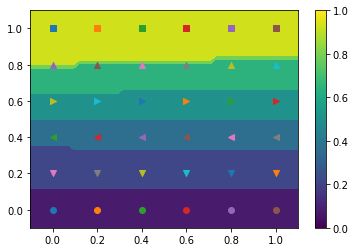

In [10]:
plt.figure()
plt.contourf(x1, x2, y_plot)
markers = ['o', 'v', '<', '>', '^', 's']
for i in range(len(y)):
    plt.scatter(x[i][1], x[i][0], marker=markers[y[i]])
plt.colorbar()
plt.show()

### Пример 5

Вернемся к XOR-problem. В примере выше мы запустили несколько классификаторов параллельно друг другу. А что, будет, если мы подадим выходы одних классификаторов на входы другим? Получится нейронная сеть! ЧТобы получилась классическая полносвязная нейронная сеть прямого распространения, нам нужно организовать нейроные определенным образом, создав слои, но давайте пока просто создадим нейронную сеть из 3 нейронов (для данной задачи такого количества будет вполне достаточно) и посмотрим на разделяющую поверхность.

In [19]:
x = np.array([[0, 0],
             [0, 1],
             [1, 0],
             [1, 1]])
y = np.array([0, 1, 1, 0])

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(2, activation='tanh', input_shape=(2,)),
    keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10000, verbose=0) # Укажем verbose=0, чтобы скрыть 500 строк печати 

In [21]:
x_plot.resize(50*50, 2)
y_plot = model.predict(x_plot)
y_plot.resize(50, 50)

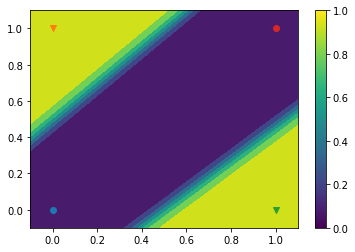

In [22]:
plt.figure()
plt.contourf(x1, x2, y_plot)
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x[i][0], x[i][1])
    else:
        plt.scatter(x[i][0], x[i][1], marker='v')
plt.colorbar()
plt.show()

Задача решена! На самом деле, всё ещё интереснее. Согласно **универсальной теореме аппроксимации** (Hornik et al., 1989; Cybenko, 1989), нейронная сеть всего с одним скрытым слоем с произвольной «сплющивающей» функцией активации (например, сигмоидой) может аппроксимировать любую измеримую по Борелю функцию, отображающую одно конечномерное пространство в другое с любой точностью, при условии что в сети достаточно скрытых блоков. Понятие измеримости по Борелю выходит за рамки курса; нам достаточно знать, что любая непрерывная функция на замкнутом ограниченном подмножестве $R^n$ измерима по Борелю и потому может быть аппроксимирована нейронной сетью. Нейронная сеть также может аппроксимировать произвольную функцию, отображающую одно конечномерное дискретное пространство в другое. Хотя первоначально эти теоремы были доказаны в терминах блоков с функциями активации, которые насыщаются при стремлении аргумента к бесконечности любого знака, универсальные теоремы аппроксимации справедливы также для более широкого класса функций активации, включающего ныне широко используемые блоки линейной ректификации (ReLU).

Универсальная теорема аппроксимации означает, что какой бы ни была обучаемая функция, найдется достаточно большая нейронная сеть,  способная ее *представить*. Однако стоит сделать два важных замечания:
1) Теорема ничего не говорит о том, насколько велика эта сеть. Cети прямого распространения с одним слоем достаточно для представления любой функции, но этот слой может оказаться невообразимо большим, не поддающимся обучению и плохо обобщающимся. Во многих случаях применение глубоких моделей позволяет уменьшить число необходимых блоков и величину ошибки обобщения.

2)  Не гарантируется, что алгоритм обучения сможет обучить такую нейронную сеть. Даже если она может представить функцию, обучение может оказаться невозможным по двум причинам. Во-первых, применяемый при обучении алгоритм оптимизации может не найти соответствующие ей значения параметров. Во-вторых, из-за переобучения алгоритм оптимизации может выбрать не ту функцию.